In [159]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [161]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [162]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [163]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [164]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [165]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [166]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [167]:
df['CoapplicantIncome']=df['CoapplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

In [169]:
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df.Loan_ID)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


In [170]:
smote = SMOTETomek(0.90)

y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [171]:
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    361
0    318
Name: Loan_Status, dtype: int64


In [172]:
scaler = StandardScaler()
x_bal = scaler.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal)
x_bal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.782068,0.537052,-1.161672,-0.695245,0.600601,-0.336325,0.087726,-0.524309,-0.272254,0.287789,0.577917,1.316539
1,-1.776214,0.537052,0.860828,0.365589,0.600601,-0.336325,-0.125058,-0.001547,-0.172275,0.287789,0.577917,-1.237546
2,-1.770360,0.537052,0.860828,-0.695245,0.600601,2.973311,-0.391122,-0.524309,-0.947109,0.287789,0.577917,1.316539
3,-1.764506,0.537052,0.860828,-0.695245,-1.664999,-0.336325,-0.461209,0.293113,-0.272254,0.287789,0.577917,1.316539
4,-1.758652,0.537052,-1.161672,-0.695245,0.600601,-0.336325,0.113106,-0.524309,-0.009810,0.287789,0.577917,1.316539


In [173]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.33, random_state = 30)

## Model

In [174]:
model = RandomForestClassifier(n_estimators=10,criterion='entropy')
model.fit(x_train,y_train)
y_predict= model.predict(x_test)
y_predict_train = model.predict(x_train)

In [175]:
print('Testing accuracy = ', accuracy_score(y_test,y_predict))
print("Training accuracy= ",accuracy_score(y_train,y_predict_train))

Testing accuracy =  0.7911111111111111
Training accuracy=  0.9911894273127754


In [176]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Loan_Status,,
0,87,27
1,20,91


In [177]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       114
           1       0.77      0.82      0.79       111

    accuracy                           0.79       225
   macro avg       0.79      0.79      0.79       225
weighted avg       0.79      0.79      0.79       225



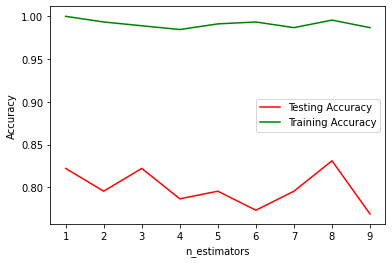

In [179]:
import matplotlib.pyplot as plt

n_estimators = np.arange(1,10)
train_accuracy = np.empty(len(n_estimators))
test_accuracy = np.empty(len(n_estimators))

for i, k in enumerate(n_estimators):
  model = RandomForestClassifier(n_estimators=10,criterion='entropy')
  model.fit(x_train,y_train)
      
    # Compute training and test data accuracy
  train_accuracy[i] = model.score(x_train, y_train)
  test_accuracy[i] = model.score(x_test, y_test)

plt.plot(n_estimators, test_accuracy, label = 'Testing Accuracy', color ='red')
plt.plot(n_estimators, train_accuracy, label = 'Training Accuracy', color ='green')
  
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()